In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FinalData.csv', sep = ';', na_values = 'NaN')

# Data Processing

In [3]:
df.ocena = df.ocena.str.replace(',','.')
df.ocena = df.ocena.astype(np.float64)
df.long = df.long.astype(np.float64)
df.ilosc_recenzji = df.ilosc_recenzji.astype(np.float64)
df['facebook'] = np.float64(df.strona_internetowa.str.contains('facebook').fillna(False))
df.accessibility = np.float64(df.accessibility.str.contains('Wheelchair').fillna(False)) #Niepelnosprawnosc

In [4]:
"""hours_columns = ['open_hours_monday', 'close_monay', 'tuesday', 'close_tue', 'wednesday',
                 'closed_wed', 'thursday', 'closed_thu', 'friday', 'closed_fri',
                 'saturday', 'closed_sat', 'sunday', 'closed_sun']


for column in hours_columns:
    new_column = []
    for el in df[column]:
        try:
            new_column.append(time.strptime(el, '%H:%M:%S').tm_hour)
        except:
            new_column.append(np.nan)
    df[column] = new_column"""
print()

In [5]:
hours_columns = [['open_hours_monday', 'close_monay'],
                 ['tuesday', 'close_tue'],
                 ['wednesday','closed_wed'],
                 ['thursday', 'closed_thu'],
                 ['friday', 'closed_fri'],
                 ['saturday', 'closed_sat'],
                 ['sunday', 'closed_sun']]

columnsToDrop = ['open_hours_monday', 'close_monay', 'tuesday', 'close_tue', 'wednesday',
                 'closed_wed', 'thursday', 'closed_thu', 'friday', 'closed_fri',
                 'saturday', 'closed_sat', 'sunday', 'closed_sun']

for pair_column in hours_columns:
    temp = []
    for column in pair_column:
        new_column = []
        for el in df[column]:
            try:
                new_column.append(time.strptime(el, '%H:%M:%S').tm_hour)
            except:
                new_column.append(np.nan)
        new_column = np.array(new_column)
        temp.append(new_column)
    wyjsciowaIloscGodzin = temp[1] - temp[0]
    roznicaDni = 24*np.float64(wyjsciowaIloscGodzin<0)
    toReturn = wyjsciowaIloscGodzin + roznicaDni
    whereAreNan = np.isnan(toReturn)
    toReturn[whereAreNan] = 0
    
    day = pair_column[1].split('_')
    name = 'Working_hour_' + day[1]
    
    df[name] = toReturn
    
df = df.drop(columnsToDrop, axis = 1)

D:\Games\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in less


In [6]:
def make_dummy_variable(df, column):
    df[column] = df[column].str.lower()

    a = [el.split(',') for el in df[column].unique() if type(el) == str]
    b = [el for lista in a for el in lista]
    c = [el[1:] if el.startswith(' ') else el for el in b]
    d = [el[:-1] if el.endswith(' ') else el for el in c]
    unique = list(set(d))
    print(unique)

    for el in unique:
        df[el] = np.float64(df[column].str.contains(el).fillna(False)) 
    return df

In [7]:
to_change = ['Offerings', 'highlights', 'Dining_options', 'Amenities', 'Atmosphere', 'Crowd', 'Payments']

for el in to_change:
    df = make_dummy_variable(df, el)

to_drop = to_change + ['nan']
df = df.drop(to_drop, axis = 1)

['wine', "kids' menu", 'wegan', 'salad', 'eko', 'vegan', 'happy hour food', 'organic dishes', 'halal food', 'late-night food', 'salad bar', 'beer', 'vegetarian options', 'all you can eat']
['sport', 'fireplace', 'outdoor seating', 'women-led', 'live music', 'karaoke', 'bar games', 'great cocktails', 'garden']
['supper', 'breakfast', 'lunch', 'dinner', 'toilet', 'good for kids', ' supper', 'dessert', 'catering', 'delivery', 'seating']
['wi-fi', 'toilet', 'do_karmienia', 'high chairs', 'good for kids', 'bar onsite']
['cosy', 'trending', 'casual']
['groups', 'family friendly']
['reservations required', 'debit card', 'credit cards', 'nfc', 'cash', 'nan']


In [8]:
df.head()

,nazwa,adres,strona_internetowa,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,...,cosy,trending,casual,groups,family friendly,reservations required,debit card,credit cards,nfc,cash
0,Pijalnia Wódki i Piwa,"Rynek 13/14, 50-101 Wrocław",NaN,51.110446,17.032568,4.2,537.0,1.0,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Forma Plynna,"wybrzeże Stanisława Wyspiańskiego 20, 50-370 W...",https://www.facebook.com/FormaPlynna/,51.107954,17.057186,4.6,303.0,0.0,0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Pizzeria Bravo,"plac Grunwaldzki 18, 48-300 Wrocław",http://www.bravo.wroclaw.pl/,51.111057,17.057905,4.0,587.0,1.0,0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Warzywniak,"plac Grunwaldzki 18-20, 50-348 Wrocław",NaN,51.111057,17.057905,4.6,170.0,1.0,0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Remont Bar,"plac Grunwaldzki 18, 48-300 Wrocław",https://www.facebook.com/Bar.Remont,51.111210,17.058386,4.4,374.0,1.0,0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df.describe()

,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,Working_hour_monay,Working_hour_tue,Working_hour_wed,...,cosy,trending,casual,groups,family friendly,reservations required,debit card,credit cards,nfc,cash
count,225.000000,225.000000,222.000000,222.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,...,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,51.109219,17.032456,4.009009,147.873874,0.497778,0.328889,0.186667,9.208889,9.680000,9.760000,...,0.515556,0.017778,0.808889,0.537778,0.120000,0.004444,0.155556,0.013333,0.022222,0.022222
std,0.021628,0.033734,0.702426,182.625826,0.501110,0.470857,0.390512,4.117245,3.553771,3.433709,...,0.500872,0.132437,0.394053,0.499682,0.325686,0.066667,0.363242,0.114953,0.147734,0.147734
min,51.030323,16.962195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.101588,17.012329,3.700000,27.000000,0.000000,0.000000,0.000000,8.000000,9.000000,9.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.113282,17.034044,4.200000,86.500000,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.120933,17.052128,4.500000,187.500000,1.000000,1.000000,0.000000,12.000000,12.000000,12.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,51.150938,17.120709,5.000000,1122.000000,1.000000,1.000000,1.000000,23.000000,23.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
odleglosci2 = []

for index, row1 in df.iterrows():
    odleglosci2.extend(np.sqrt((row1.long - df.long)**2 + (row1.lat - df.lat)**2).values.tolist())
    
odleglosci2 = [el for el in odleglosci2 if el!= 0]

kwantyle = np.percentile(odleglosci2, [10, 40, 75])

In [11]:
kolumny = [[],[],[]]

for index, row1 in df.iterrows():
    odleglosci_od_innych_lokali = np.sqrt((row1.long - df.long)**2 + (row1.lat - df.lat)**2).values.tolist() 
    for i in range(3):
        kolumny[i].append(np.sum(odleglosci_od_innych_lokali <= kwantyle[i]))
        
odleglosci = pd.DataFrame(data = {'blisko':kolumny[0],'srednio':kolumny[1],'daleko':kolumny[2]})
df = pd.concat([df, odleglosci], axis = 1)

# Analysis

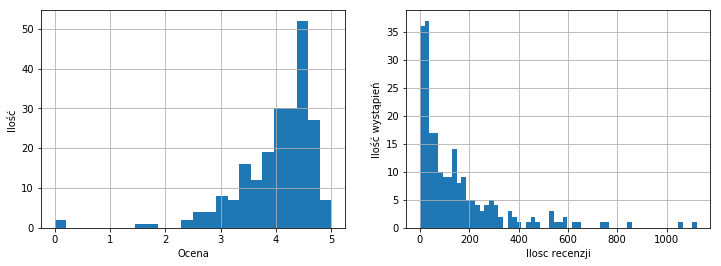

In [12]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
df.ocena.hist(bins = 24)
plt.xlabel('Ocena')
plt.ylabel('Ilość')

plt.subplot(1,2,2)
df.ilosc_recenzji.hist(bins = 60)
plt.xlabel('Ilosc recenzji')
plt.ylabel('Ilość wystąpień')

plt.show()

In [13]:
df['dobry_lokal'] = np.float64(np.logical_and(df.ilosc_recenzji > 150, df.ocena >= 4.4))
df.dobry_lokal.sum()

35.0

In [14]:
df['dobry_lokal2'] = np.float64(np.logical_or(df.ilosc_recenzji > 300, np.logical_and(df.ilosc_recenzji >= 50, df.ocena >= 4.5)))
df.dobry_lokal2.sum()

61.0

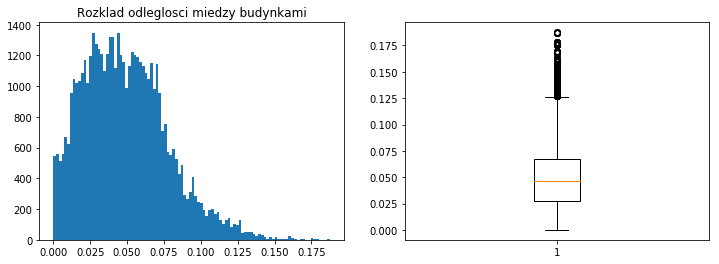

In [15]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.hist(odleglosci2, bins = 100)
plt.title('Rozklad odleglosci miedzy budynkami')

plt.subplot(1,2,2)
plt.boxplot(odleglosci2)

plt.show()

Korelacje

In [16]:
korelacje = df.corr()[['ilosc_recenzji', 'ocena', 'dobry_lokal', 'dobry_lokal2']]
for idx, row in korelacje[abs(korelacje) > 0.3].iterrows():
    if not row.isnull().all():
        print(row.name, row.ilosc_recenzji, row.ocena, row.dobry_lokal, row.dobry_lokal2)

ocena nan 1.0 0.324250742383 0.403870008111
ilosc_recenzji 1.0 nan 0.475290522185 0.620165594286
good for kids nan nan nan 0.318369998928
cosy nan 0.353279491901 0.342433765771 0.351122005681
groups 0.300763200193 nan nan nan
dobry_lokal 0.475290522185 0.324250742383 1.0 0.565814458767
dobry_lokal2 0.620165594286 0.403870008111 0.565814458767 1.0


Skorelowanie:
- Good for kids z dobry_lokal
- Cosy z ilość recenzji
- Groups z ocena

In [17]:
a = df.groupby('dobry_lokal').mean()

for col in a.columns:
    print(a[col])

dobry_lokal
0.0    51.109869
1.0    51.105693
Name: lat, dtype: float64
dobry_lokal
0.0    17.029419
1.0    17.048945
Name: long, dtype: float64
dobry_lokal
0.0    3.910695
1.0    4.534286
Name: ocena, dtype: float64
dobry_lokal
0.0    110.406417
1.0    348.057143
Name: ilosc_recenzji, dtype: float64
dobry_lokal
0.0    0.505263
1.0    0.457143
Name: accessibility, dtype: float64
dobry_lokal
0.0    0.363158
1.0    0.142857
Name: czy_sieciowka, dtype: float64
dobry_lokal
0.0    0.152632
1.0    0.371429
Name: facebook, dtype: float64
dobry_lokal
0.0    9.205263
1.0    9.228571
Name: Working_hour_monay, dtype: float64
dobry_lokal
0.0     9.600000
1.0    10.114286
Name: Working_hour_tue, dtype: float64
dobry_lokal
0.0     9.694737
1.0    10.114286
Name: Working_hour_wed, dtype: float64
dobry_lokal
0.0     9.715789
1.0    10.228571
Name: Working_hour_thu, dtype: float64
dobry_lokal
0.0     9.821053
1.0    10.742857
Name: Working_hour_fri, dtype: float64
dobry_lokal
0.0     8.884211
1.0    10

- w średniej i dalekiej odległości więcej lokali
- ważne są grupy dla dobrych lokali
- ważne jest oznaczenie 'cosy' dla dobrego lokalu (prawie wszystkie mają ten znacznik)
- ważne jest 'good for kids'
- stosunkowa duża ilość lokali typu vegan
- istotne jest podawanie piwa
- średnia ilość godzin pracujących jest wyższa o ok. 0,5h

In [18]:
a = df.groupby('dobry_lokal2').mean()

for col in a.columns:
    print(a[col])

dobry_lokal2
0.0    51.109464
1.0    51.108562
Name: lat, dtype: float64
dobry_lokal2
0.0    17.029402
1.0    17.040668
Name: long, dtype: float64
dobry_lokal2
0.0    3.834783
1.0    4.468852
Name: ocena, dtype: float64
dobry_lokal2
0.0     78.316770
1.0    331.459016
Name: ilosc_recenzji, dtype: float64
dobry_lokal2
0.0    0.457317
1.0    0.606557
Name: accessibility, dtype: float64
dobry_lokal2
0.0    0.359756
1.0    0.245902
Name: czy_sieciowka, dtype: float64
dobry_lokal2
0.0    0.146341
1.0    0.295082
Name: facebook, dtype: float64
dobry_lokal2
0.0    9.225610
1.0    9.163934
Name: Working_hour_monay, dtype: float64
dobry_lokal2
0.0    9.567073
1.0    9.983607
Name: Working_hour_tue, dtype: float64
dobry_lokal2
0.0     9.621951
1.0    10.131148
Name: Working_hour_wed, dtype: float64
dobry_lokal2
0.0     9.646341
1.0    10.196721
Name: Working_hour_thu, dtype: float64
dobry_lokal2
0.0     9.768293
1.0    10.491803
Name: Working_hour_fri, dtype: float64
dobry_lokal2
0.0    8.884146

- średnio więcej pracują w czwartki, piątki, soboty, niedziele
- beer istotne
- wegan = 0 dla słabych lokali 
- 25% lokali z żywą muzyką jest w kategorii dobry lokal, przy czym prawie 0 lokali jest w kategorii słaby lokal
- good for kids x2 w dobrych lokalach
- prawie zawsze dobry lokal jest 'casual', 'cosy'
- family friendly jest bardzo istotne, 73% dobrych lokali takich jest
- więcej średnio lokali w oddali i średniej odległości

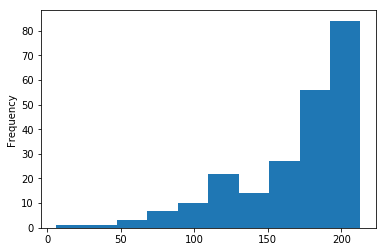

In [67]:
df.daleko.plot(kind = 'hist')
plt.show()

# Models

### Regresja

In [19]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

D:\Games\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
df2 = df.drop(['nazwa', 'adres', 'strona_internetowa', 'lat', 'long'], axis = 1)

In [21]:
df2 = df2.dropna()

In [22]:
Y = df2.ocena.values
X = df2.drop(['ocena'], axis = 1).values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [25]:
modele = [DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor()]

In [26]:
for model in modele:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    print(model.__class__.__name__)
    print(model)
    print('MSE = ', mse)
    print('-'*30)

DecisionTreeRegressor
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
MSE =  0.380666666667
------------------------------
RandomForestRegressor
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
MSE =  0.124266666667
------------------------------
GradientBoostingRegressor
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3

### Klasyfikacja

In [27]:
df3 = df.fillna(0)

In [58]:
Y = df3.dobry_lokal2
X = df3.drop(['ocena', 'nazwa', 'adres', 'strona_internetowa', 
             'lat', 'long', 'ilosc_recenzji', 'dobry_lokal','dobry_lokal2'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [60]:
modele = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators = 1000), GradientBoostingClassifier()]

In [61]:
wybraneCechy = []

for model in modele:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    res_cv = cross_val_score(model, X_train, y_train, cv = 10, scoring = 'precision')
    
    print(model.__class__.__name__)
    #print(model)
    print('Accuracy = ', accuracy)
    print('ROC AUC = ', roc)
    print('Cross Validation = ', np.mean(res_cv))
    wazneCechy = pd.DataFrame({'cechy':X.columns, 'wazne':np.round(model.feature_importances_, 3)})
    wazneCechy = wazneCechy.sort_values('wazne', ascending = False)
    wazneCechy = wazneCechy.head(5)
    wybraneCechy.extend(wazneCechy.cechy.values.tolist())
    print(wazneCechy)
    print('-'*30)

DecisionTreeClassifier
Accuracy =  0.555555555556
ROC AUC =  0.445043103448
Cross Validation =  0.458333333333
                 cechy  wazne
60             srednio  0.242
48                cosy  0.148
59              daleko  0.142
3   Working_hour_monay  0.124
58              blisko  0.083
------------------------------


D:\Games\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Games\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Games\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


RandomForestClassifier
Accuracy =  0.666666666667
ROC AUC =  0.559267241379
Cross Validation =  0.275
            cechy  wazne
60        srednio  0.102
59         daleko  0.090
58         blisko  0.075
48           cosy  0.059
38  good for kids  0.048
------------------------------
GradientBoostingClassifier
Accuracy =  0.666666666667
ROC AUC =  0.573275862069
Cross Validation =  0.291666666667
            cechy  wazne
60        srednio  0.238
59         daleko  0.099
58         blisko  0.088
48           cosy  0.066
38  good for kids  0.045
------------------------------


D:\Games\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
list(set(wybraneCechy))

['cosy', 'daleko', 'Working_hour_monay', 'srednio', 'good for kids', 'blisko']

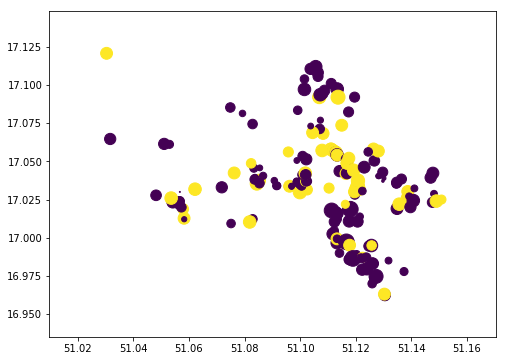

In [63]:
plt.figure(figsize = (8,6))

x = df.lat
y = df.long

plt.scatter(x,y, c = df.dobry_lokal2, s = np.exp(1.1*df.ocena))
plt.show()

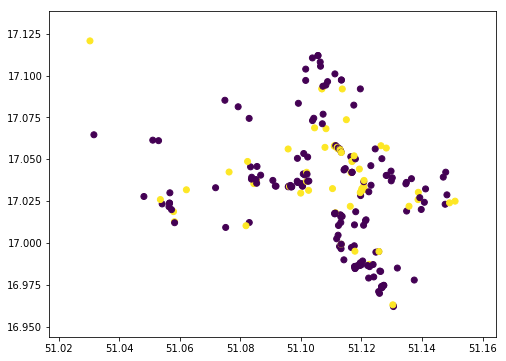

In [68]:
plt.figure(figsize = (8,6))

x = df.lat
y = df.long

plt.scatter(x,y, c = df.dobry_lokal2)
plt.show()

Metoda centroidów do wyznaczenia jakiś potencjalnych dobrych lub słabych miejsc

In [87]:
toCluster = df.drop(['nazwa', 'adres', 'strona_internetowa'], axis = 1).dropna()

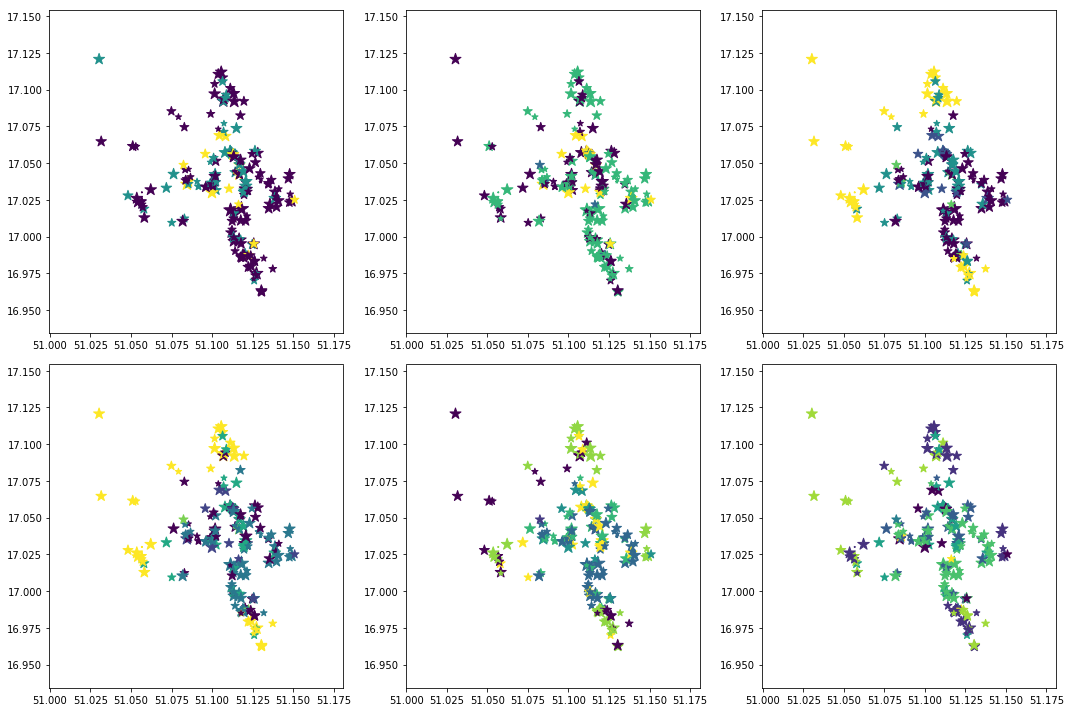

In [88]:
labele = []
plt.figure(figsize = (15,10))

for i in range(3,9):
    means = KMeans(n_clusters = i)
    means.fit(toCluster)
    labele.append(means.labels_)
    plt.subplot(2,3,i-2)
    plt.scatter(toCluster.lat,toCluster.long, marker = '*', c = means.labels_, s = 1.5*np.exp(toCluster.ocena))
    #plt.scatter(x,y, marker = 'o', s = 3, c = df.dobry_lokal2)
    
plt.tight_layout()
plt.show()

In [96]:
daneZlabelami = pd.concat([toCluster, pd.Series(labele[1], index = toCluster.index)], axis = 1)

In [98]:
toCluster

,lat,long,ocena,ilosc_recenzji,accessibility,czy_sieciowka,facebook,Working_hour_monay,Working_hour_tue,Working_hour_wed,...,reservations required,debit card,credit cards,nfc,cash,blisko,daleko,srednio,dobry_lokal,dobry_lokal2
0,51.110446,17.032568,4.2,537.0,1.0,0,0.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,39,213,138,0.0,1.0
1,51.107954,17.057186,4.6,303.0,0.0,0,1.0,12.0,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,30,185,114,1.0,1.0
2,51.111057,17.057905,4.0,587.0,1.0,0,0.0,12.0,12.0,12.0,...,0.0,0.0,0.0,0.0,0.0,31,183,114,0.0,1.0
3,51.111057,17.057905,4.6,170.0,1.0,0,0.0,9.0,9.0,9.0,...,0.0,1.0,0.0,0.0,0.0,31,183,114,1.0,1.0
4,51.111210,17.058386,4.4,374.0,1.0,0,1.0,13.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,29,182,114,1.0,1.0
6,51.111962,17.057209,4.3,29.0,0.0,0,1.0,7.0,7.0,7.0,...,0.0,1.0,0.0,0.0,0.0,31,182,115,0.0,0.0
7,51.111962,17.057209,4.5,368.0,0.0,0,1.0,9.0,9.0,9.0,...,0.0,1.0,0.0,0.0,0.0,31,182,115,1.0,1.0
8,51.112085,17.056855,4.5,360.0,0.0,0,0.0,10.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,31,184,117,1.0,1.0
9,51.112185,17.056537,4.2,431.0,0.0,1,0.0,11.0,11.0,11.0,...,0.0,1.0,0.0,0.0,0.0,31,184,119,0.0,1.0
10,51.112192,17.056405,4.5,364.0,0.0,0,1.0,16.0,16.0,16.0,...,0.0,0.0,0.0,0.0,0.0,31,184,120,1.0,1.0
